### Discussion Related With Outliers And Impact On Machine Learning!!
Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM-------- Not Sensitive To Outliers
3. Linear Regression---------- Sensitive To Outliers
4. Logistic Regression------- Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive
10. PCA-------------------------- Sensitive
11. Neural Networks-------------- Sensitive

In [93]:
import pandas as pd
import seaborn as sns

In [94]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [96]:
df.shape

(891, 12)

In [97]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [98]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

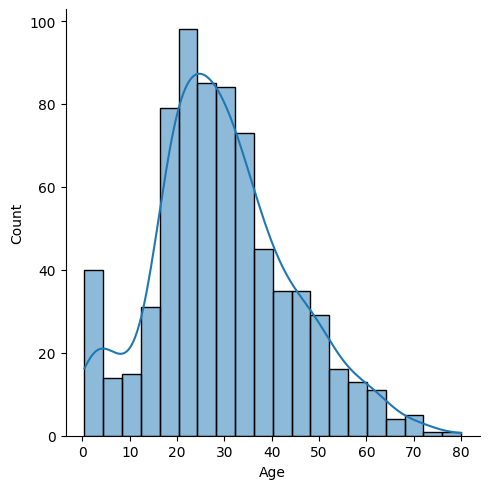

In [100]:
sns.displot(df["Age"].dropna(),kde=True)

### Gaussian Distributed

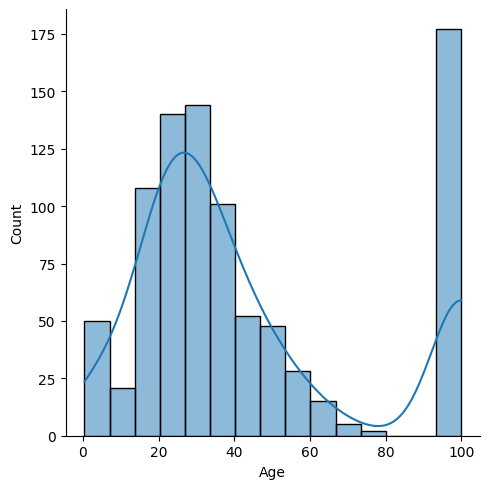

In [101]:
sns.displot(df["Age"].fillna(100),kde=True)

Text(0, 0.5, 'No of passenger')

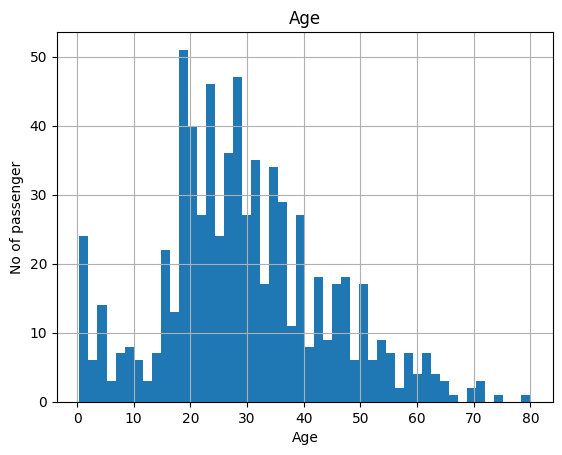

In [102]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

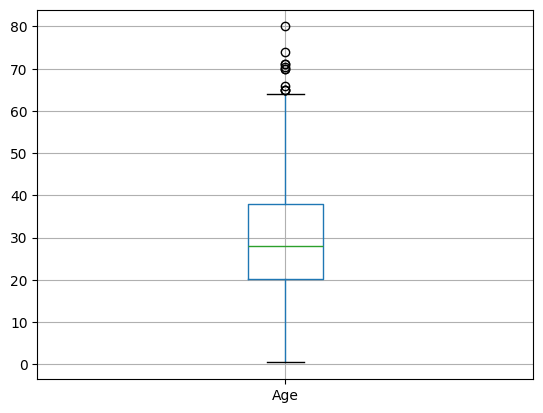

In [103]:
figure = df.boxplot(column="Age")

In [104]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [105]:
upper_boundary=df['Age'].mean() + (3* df['Age'].std())
lower_boundary=df['Age'].mean() - (3* df['Age'].std())
print(lower_boundary), print(upper_boundary),print(df['Age'].mean())

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

In [106]:
iqr = df["Age"].quantile(0.75)-df["Age"].quantile(0.25)
iqr

17.875

In [107]:
lower_bridge = df["Age"].quantile(0.25)-(iqr*1.5)
upper_bridge = df["Age"].quantile(0.75)+(iqr*1.5)
print(lower_bridge, "/" , upper_bridge)

-6.6875 / 64.8125


Text(0, 0.5, 'No of passenger')

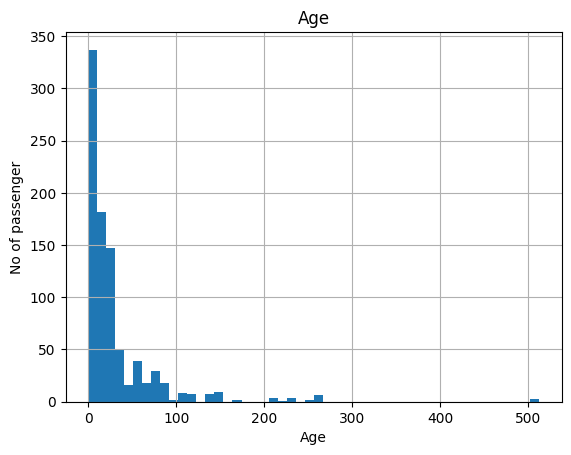

In [108]:
figure=df["Fare"].hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

<Axes: ylabel='Fare'>

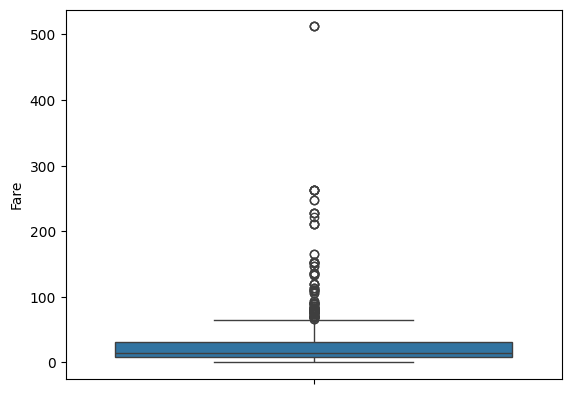

In [109]:
sns.boxplot(df["Fare"])

In [110]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [111]:
iqr = df["Fare"].quantile(0.75)-df["Fare"].quantile(0.25)
iqr

23.0896

In [112]:
lower_bridge = df["Fare"].quantile(0.25)-(iqr*1.5)
upper_bridge = df["Fare"].quantile(0.75)+(iqr*1.5)
print(lower_bridge, "/" , upper_bridge)

-26.724 / 65.6344


### Extreme Ourliers

In [113]:
lower_bridge = df["Fare"].quantile(0.25)-(iqr*3)
upper_bridge = df["Fare"].quantile(0.75)+(iqr*3)
print(lower_bridge, "/" , upper_bridge)

-61.358399999999996 / 100.2688


### Remove Outliers

In [114]:
data = df.copy()

In [115]:
data.loc[data["Age"]>=73,"Age"]=73

In [116]:
data.loc[data["Fare"]>=100,"Fare"]=100

Text(0, 0.5, 'No of passenger')

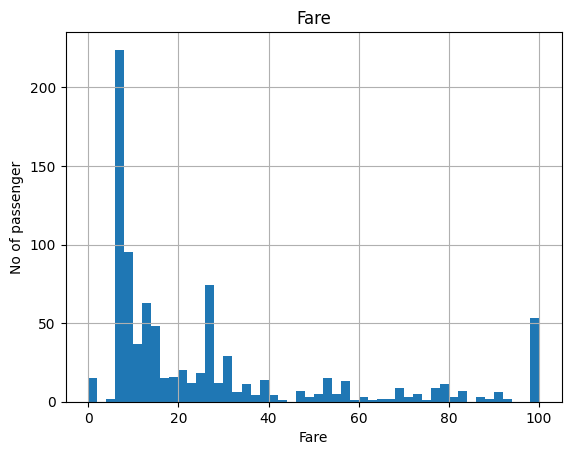

In [117]:
figure=data["Fare"].hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

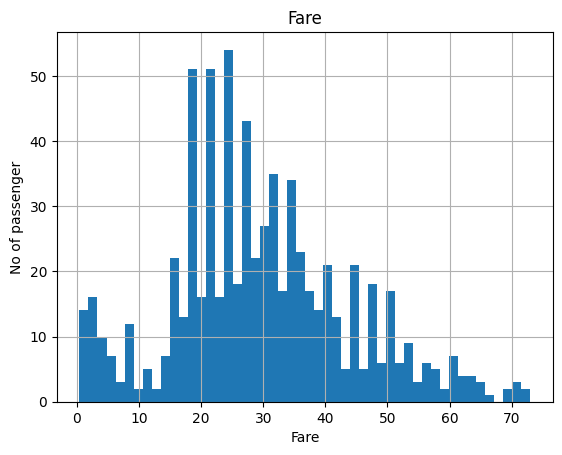

In [118]:
figure=data["Age"].hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[["Age","Fare"]].fillna(0),data["Survived"],test_size=0.3)

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
classfier = LogisticRegression()
classfier.fit(X_train,y_train)
y_pred=classfier.predict(X_test)
y_pred1=classfier.predict_proba(X_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print(f"Accurecy score : {accuracy_score(y_test,y_pred)}")
print(f"roc aud score : {roc_auc_score(y_test,y_pred1[:,1])}")

Accurecy score : 0.6604477611940298
roc aud score : 0.7072851153039832


In [122]:
from sklearn.ensemble import RandomForestClassifier
classfier = RandomForestClassifier()
classfier.fit(X_train,y_train)
y_pred=classfier.predict(X_test)
y_pred1=classfier.predict_proba(X_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print(f"Accurecy score : {accuracy_score(y_test,y_pred)}")
print(f"roc aud score : {roc_auc_score(y_test,y_pred1[:,1])}")

Accurecy score : 0.6343283582089553
roc aud score : 0.6978802702073144


In [123]:
from xgboost import XGBClassifier

classfier = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
classfier.fit(X_train, y_train)
y_pred=classfier.predict(X_test)
y_pred1=classfier.predict_proba(X_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print(f"Accurecy score : {accuracy_score(y_test,y_pred)}")
print(f"roc aud score : {roc_auc_score(y_test,y_pred1[:,1])}")

Accurecy score : 0.664179104477612
roc aud score : 0.7369555089680876
